## Project 4: Analysis of Ford Cars (Regression)
##### By Delice Mambi-Lambu

##### Abstract
This project is about the data analysis of thr Ford Cars dataset = a multivariate dataset that consists of 9 features and 18k instances.We seek to use all data. The dataset contains information about price, transmission, milage, fuel type, road tax, miles per gallon (mpg), and engine size. We want to create the regression model to investigate the price of a car.



##### Citation
Kaggle Dataset : 100,000 UK Used Car Data set

#### Importing Libaries 

In [1]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Changing Our Style
mpl.style.use('ggplot')

In [3]:
from pathlib import Path
print(Path.cwd())

C:\Users\delic\OneDrive\Documents\Data Science Projects\Regression


#### Data Importing

In [4]:
# import dataset 
path = r'C:\Users\delic\OneDrive\Documents\Data Science Projects\Regression\Cars\ford.csv'
df = pd.read_csv(path)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


#### Data Cleaning 

In [5]:
# changing our columns 
print(df.columns)
print(df.shape)
print(df.info())

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
(17965, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB
None


In [6]:
df.rename(columns ={'year':'age'}, inplace = True)
print(df.columns)

Index(['model', 'age', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [7]:
# Reformatting our Year -> Age
df['age'] = abs(2024 - df['age'])
df.head()

,model,age,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,7,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,6,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,7,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,5,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,5,16500,Automatic,1482,Petrol,145,48.7,1.0


In [8]:
# dtypes
df.dtypes

model            object
age               int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [9]:
# Null Values
missingValues = df.isnull()
missingValues.head()

,model,age,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [10]:
# Count missing values
for col in missingValues.columns.values.tolist():
    print(col)
    print(missingValues[col].value_counts())
    print("")

model
model
False    17965
Name: count, dtype: int64

age
age
False    17965
Name: count, dtype: int64

price
price
False    17965
Name: count, dtype: int64

transmission
transmission
False    17965
Name: count, dtype: int64

mileage
mileage
False    17965
Name: count, dtype: int64

fuelType
fuelType
False    17965
Name: count, dtype: int64

tax
tax
False    17965
Name: count, dtype: int64

mpg
mpg
False    17965
Name: count, dtype: int64

engineSize
engineSize
False    17965
Name: count, dtype: int64



In [11]:
# No need to clean data lets send it off 
df.to_csv('audi1.csv', index = False)

#### Exploratory Data Analysis 

In [12]:
# Information of the numerical columns 
df.describe()

,age,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,7.137434,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.036350,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,4.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,6.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,7.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,8.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,36.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [13]:
# Summerise Categorical Data
df.value_counts()

model             age  price  transmission  mileage  fuelType  tax  mpg   engineSize
 Mondeo           4    22000  Manual        10       Diesel    145  65.7  2.0           4
 Fiesta           5    13500  Manual        6        Petrol    145  48.7  1.1           3
 Focus            5    14998  Manual        7000     Petrol    145  58.9  1.0           3
 Fiesta           5    13130  Manual        151      Petrol    145  48.7  1.1           3
                       14995  Manual        15       Petrol    145  58.9  1.0           3
                                                                                       ..
                  7    9998   Manual        17227    Petrol    145  65.7  1.0           1
                                            17265    Petrol    145  65.7  1.0           1
                                            19096    Petrol    145  65.7  1.0           1
                                            20347    Petrol    0    65.7  1.0           1
 Transit Tourne

In [14]:
# Calulate mean by Model
df1 = df.groupby(['model','transmission','fuelType'], as_index = False).mean()
df1

,model,transmission,fuelType,age,price,mileage,tax,mpg,engineSize
0,B-MAX,Automatic,Petrol,8.400000,8700.560000,19971.600000,158.200000,44.100000,1.600000
1,B-MAX,Manual,Diesel,8.602564,7738.717949,31205.628205,19.935897,72.111538,1.526923
2,B-MAX,Manual,Petrol,8.456989,8448.715054,28073.833333,87.231183,54.452151,1.090323
3,B-MAX,Semi-Auto,Petrol,8.606061,8325.409091,27753.090909,159.924242,44.100000,1.600000
4,C-MAX,Automatic,Diesel,8.071429,10248.285714,24263.333333,60.119048,61.566667,1.595238
...,...,...,...,...,...,...,...,...,...
75,Tourneo Connect,Manual,Diesel,7.045455,13603.863636,26962.681818,90.909091,61.309091,1.509091
76,Tourneo Connect,Manual,Petrol,7.000000,10998.000000,16310.000000,125.000000,50.400000,1.000000
77,Tourneo Custom,Automatic,Diesel,5.375000,24268.875000,12592.000000,146.250000,31.687500,2.000000
78,Tourneo Custom,Manual,Diesel,6.426230,20759.049180,22997.819672,166.721311,39.519672,2.009836


We'll explore catorgorical Features in project four. Here we want to focus on price.

In [15]:
# New dataframe to use for now
dfR = df[['age', 'mileage', 'tax', 'mpg', 'engineSize', 'price']]
dfR.head()

,age,mileage,tax,mpg,engineSize,price
0,7,15944,150,57.7,1.0,12000
1,6,9083,150,57.7,1.0,14000
2,7,12456,150,57.7,1.0,13000
3,5,10460,145,40.3,1.5,17500
4,5,1482,145,48.7,1.0,16500


In [16]:
# Corrlation 

dfR.corr()

,age,mileage,tax,mpg,engineSize,price
age,1.000000,0.715943,-0.297598,0.020190,0.138526,-0.642767
mileage,0.715943,1.000000,-0.260550,0.120077,0.215001,-0.530727
tax,-0.297598,-0.260550,1.000000,-0.503013,0.184311,0.406821
mpg,0.020190,0.120077,-0.503013,1.000000,-0.260527,-0.346427
engineSize,0.138526,0.215001,0.184311,-0.260527,1.000000,0.411156
price,-0.642767,-0.530727,0.406821,-0.346427,0.411156,1.000000


##### Highlights

There are three correlated relationships:
* Mileage and Age - Strong Positve Relationship: 0.715943
* Tax and MPG - Strong Negative Relationship: -0.503013
* Age and Price - Strong Negative Relationship: -0.642767
* Milage and Price - Strong Negative Relationship: -0.530727

However, whilst two features does have a strong correlation with Price the other features don't - this could have major implications for model III - when we use mutiple linear regression. Lets look at the correlation in more detail.

In [17]:
# Studying Pearson Correlation 

col1 = ['mileage', 'tax', 'age', 'mileage']
col2 = ['age', 'mpg', 'price', 'price']

for i in range(4):
    pearsonCoef, pValue = stats.pearsonr(df[col1[i]], df[col2[i]])
    print(col1[i], col2[i], pearsonCoef, pValue)
    

mileage age 0.7159430353975456 0.0
tax mpg -0.503012542075243 0.0
age price -0.6427665758156087 0.0
mileage price -0.530726714323418 0.0


#### Data Visualisation
Lets focus on our top four corrlated relationships

In [18]:
# Our dataframes
fit1 = np.polyfit(df['mileage'], df['age'], 1)
fit2 = np.polyfit(df['tax'], df['mpg'], 1)
fit3 = np.polyfit(df['age'], df['price'], 1)
fit4 = np.polyfit(df['mileage'], df['price'], 1)

Text(0, 0.5, 'Price')

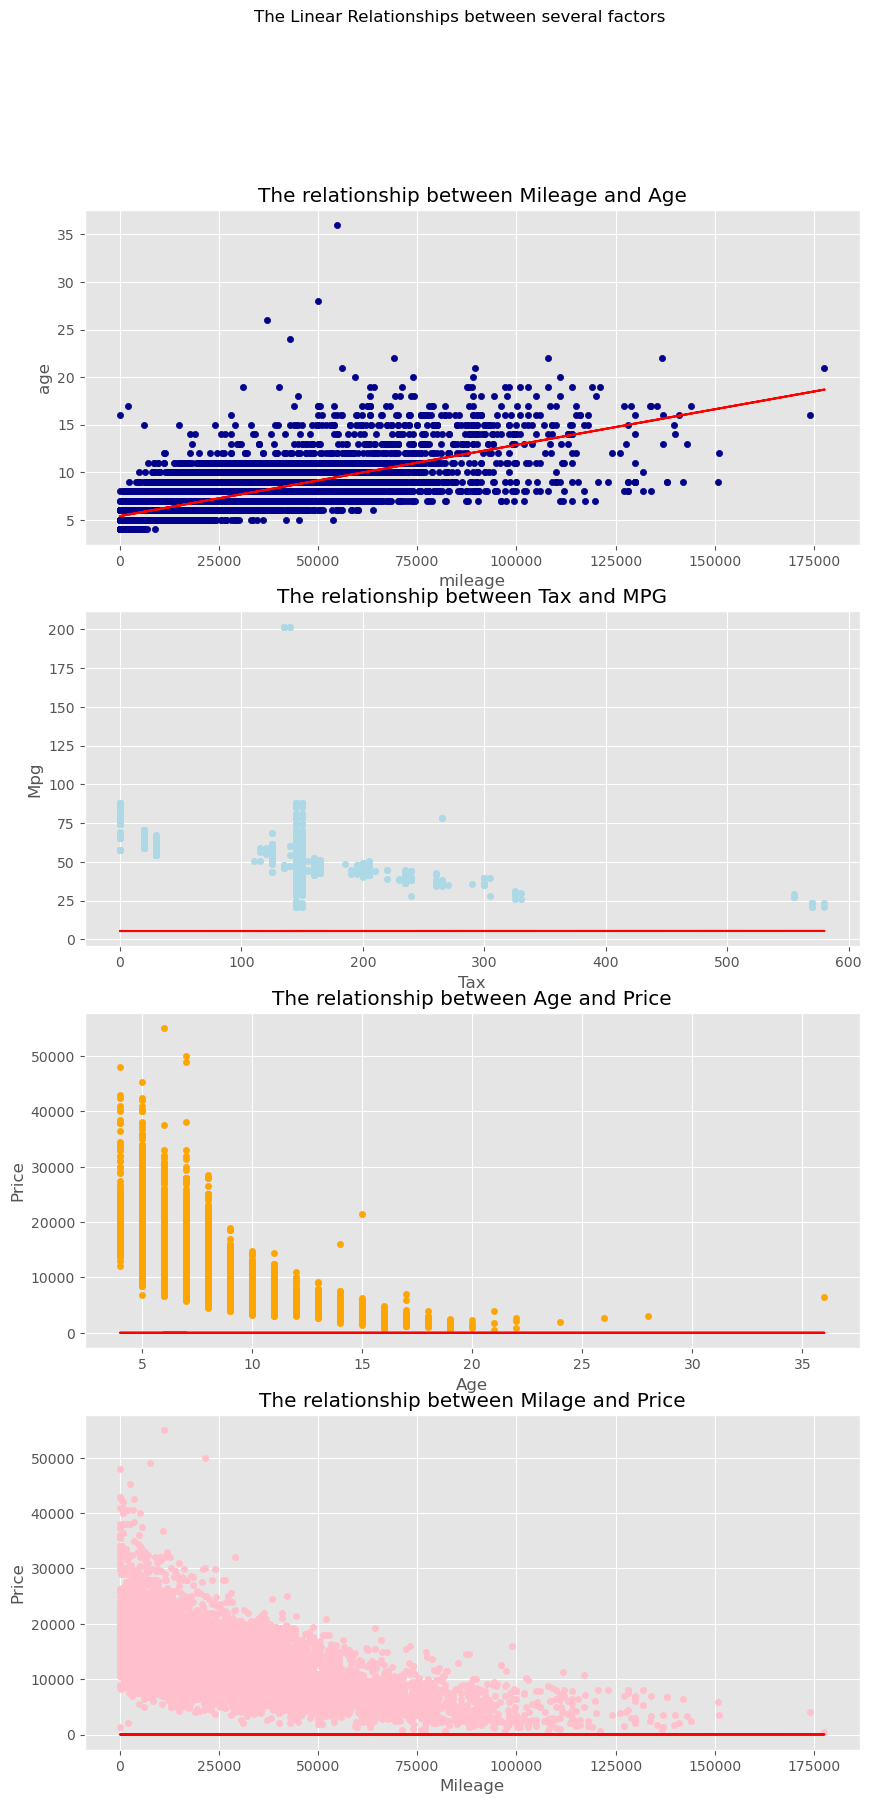

In [19]:
# Our regression plots

fig = plt.figure()

fig.suptitle('The Linear Relationships between several factors')
ax0 = fig.add_subplot(4,1,1)
ax1 = fig.add_subplot(4,1,2)
ax2 = fig.add_subplot(4,1,3)
ax3 = fig.add_subplot(4,1,4)

dfR.plot(kind = 'scatter', x = 'mileage', y = 'age', figsize = (10,20), color = 'darkblue', ax = ax0) 
ax0.plot(df['mileage'], fit1[0] * df['mileage'] + fit1[1], color ='red')
ax0.set_title('The relationship between Mileage and Age')
ax0.set_xlabel('mileage')
ax0.set_ylabel('age')

# Plot 2
dfR.plot(kind = 'scatter', x = 'tax', y = 'mpg', figsize = (10,20), color = 'lightblue', ax = ax1) 
ax1.plot(df['tax'], fit1[0] * df['tax'] + fit1[1], color ='red')
ax1.set_title('The relationship between Tax and MPG')
ax1.set_xlabel('Tax')
ax1.set_ylabel('Mpg')

# Plot 3
dfR.plot(kind = 'scatter', x = 'age', y = 'price', figsize = (10,20), color = 'orange', ax = ax2) 
ax2.plot(df['age'], fit1[0] * df['age'] + fit1[1], color ='red')
ax2.set_title('The relationship between Age and Price')
ax2.set_xlabel('Age')
ax2.set_ylabel('Price')

# Plot 4
dfR.plot(kind = 'scatter', x = 'mileage', y = 'price', figsize = (10,20), color = 'pink', ax = ax3) 
ax3.plot(df['mileage'], fit1[0] * df['mileage'] + fit1[1], color ='red')
ax3.set_title('The relationship between Milage and Price')
ax3.set_xlabel('Mileage')
ax3.set_ylabel('Price')


Oh now it clearly a more exponential relationship is more suited for 2 of the relationships however Tax and Mpg relationship isn't really spread put which could indicate a  catagorical relationship. The only relationship where a linear relationship is more suited is age and mileage - as expected. 

Text(0.5, 1.0, 'The residual relationship between Mileage and Price')

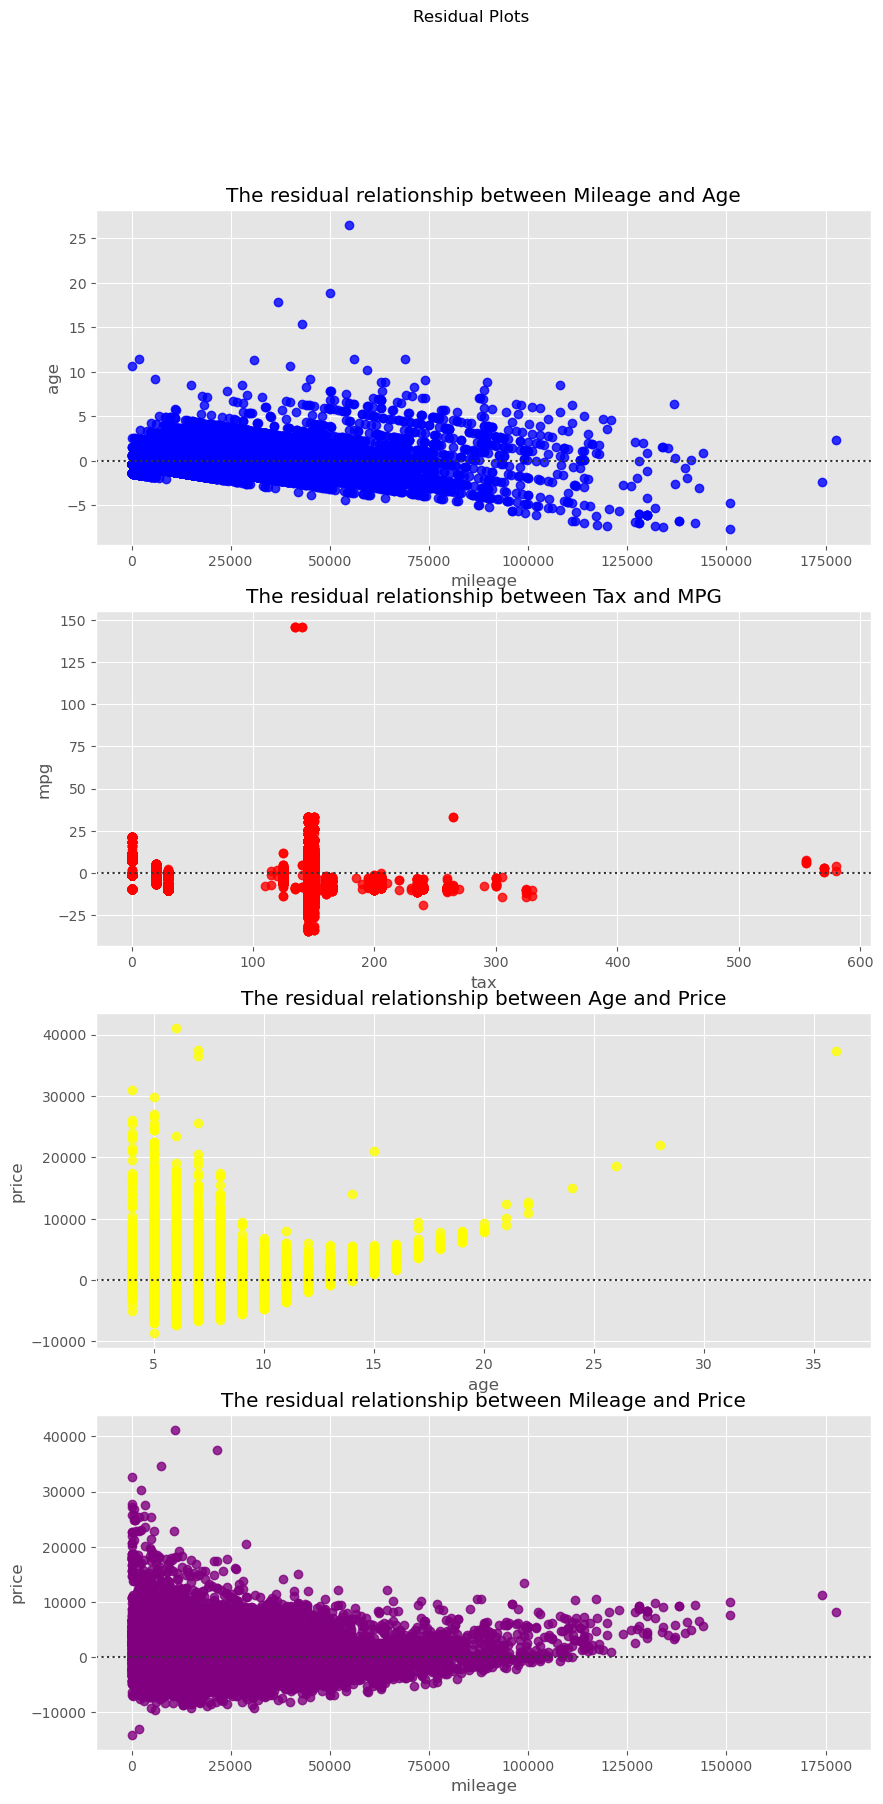

In [20]:
# Residual Plot for Mileage and Age 
import seaborn as sns 

fig2 = plt.figure()
fig2.suptitle('Residual Plots')

ax0 = fig2.add_subplot(4,1,1)
ax1 = fig2.add_subplot(4,1,2)
ax2 = fig2.add_subplot(4,1,3)
ax3 = fig2.add_subplot(4,1,4)
fig2.set_size_inches(10, 20)
fig.tight_layout(pad=1.5)

sns.residplot(x = 'mileage', y = 'age', data = dfR, color = 'blue', ax = ax0)
ax0.set_title('The residual relationship between Mileage and Age')

# Plot 2
sns.residplot(x = 'tax', y = 'mpg', data = dfR, color = 'red',  ax = ax1)
ax1.set_title('The residual relationship between Tax and MPG')

# Plot 3
sns.residplot(x = 'age', y = 'price', data = dfR, color = 'yellow', ax = ax2)
ax2.set_title('The residual relationship between Age and Price')

# Plot 4
sns.residplot(x = 'mileage', y = 'price', data = dfR, color = 'purple', ax = ax3)
ax3.set_title('The residual relationship between Mileage and Price')



#### Modelling

In [21]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#### I - Mileage vs. Price (Simple Linear Regression)

##### Model Development

In [22]:
# Our Features and Target
x = df[['mileage']]
y = df[['price']]

In [23]:
# Performing Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = 0.1,
                                                   random_state = 1)

In [24]:
# Check the number of samples 
print('Shape of test samples:', x_test.shape)
print('Shape of train samples:', x_train.shape)

Shape of test samples: (1797, 1)
Shape of train samples: (16168, 1)


In [25]:
# Constructing Our Model
lr1 = LinearRegression()
lr1

LinearRegression()

In [26]:
# Fitting the Model
lr1.fit(x_train, y_train)

# prediction
y_pred = lr1.predict(x_test)

In [27]:
# Coefficent and Intercept 
print('coefficent:', lr1.coef_)
print('intercept:', lr1.intercept_)

coefficent: [[-0.1293835]]
intercept: [15303.28086612]


In [28]:
# Metrics 
print('Mean Absolute Error:', np.mean(np.absolute(y_test, y_pred)))
print('Mean Squared Error:', np.mean(y_test - y_pred)**2)
print('r2_score:', r2_score(y_test, y_pred))

Mean Absolute Error: 12268.14245965498
Mean Squared Error: 0.0
r2_score: 1.0


##### Model Evaluation

In [29]:
#R2 Score for each fold
rCross = cross_val_score(lr1, x, y, cv = 10)
rCross 

array([0.2134818 , 0.23786941, 0.17091361, 0.2212383 , 0.20872503,
       0.21050155, 0.1061398 , 0.32930766, 0.23806623, 0.41483395])

In [30]:
# R2 Score 
print('r2 : Mean of the folds:', rCross.mean())
print('r2: Standard Deviation of the Folds', rCross.std())

r2 : Mean of the folds: 0.2351077336295362
r2: Standard Deviation of the Folds 0.07994165658510144


In [31]:
rCross =  -1* cross_val_score(lr1, x, y, cv = 10, scoring = 'neg_mean_squared_error')
rCross 

array([15511975.82783059, 15940578.50079684, 14166879.82988049,
       15259063.82219566, 15372380.07856047, 18003565.17304515,
       20065271.27416483, 18977734.58148261, 14054428.29727316,
       15127245.99288261])

In [32]:
# Mean Squared Error
print('MSE : Mean of the folds:', rCross.mean())
print('MSE: Standard Deviation of the Folds', rCross.std())

MSE : Mean of the folds: 16247912.337811237
MSE: Standard Deviation of the Folds 1946403.6569684707


In [33]:
# Cross Val Predict
yhat = cross_val_predict(lr1, x,y, cv = 10)
yhat[0:5]

array([[13267.75386246],
       [14154.23760841],
       [13718.425092  ],
       [13976.32066945],
       [15136.3339432 ]])

#### II - Mileage, Age vs. Price (Mutiple Linear Regression)

##### Model Development

In [34]:
# Our Features and Target
x = df[['mileage', 'age']]
y = df[['price']]

In [35]:
# Performing Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = 0.1,
                                                   random_state = 1)

In [36]:
# Check the number of samples 
print('Shape of test samples:', x_test.shape)
print('Shape of train samples:', x_train.shape)

Shape of test samples: (1797, 2)
Shape of train samples: (16168, 2)


In [37]:
# Constructing Our Model
lr2 = LinearRegression()
lr2

LinearRegression()

In [38]:
# Fitting the Model
lr2.fit(x_train, y_train)

# prediction
y_pred = lr2.predict(x_test)

In [39]:
# Coefficent and Intercept 
print('coefficent:', lr2.coef_)
print('intercept:', lr2.intercept_)

coefficent: [[-3.58323701e-02 -1.25070927e+03]]
intercept: [22044.35657889]


In [40]:
# Metrics 
print('Mean Absolute Error:', np.mean(np.absolute(y_test, y_pred)))
print('Mean Squared Error:', np.mean(y_test - y_pred)**2)
print('r2_score:', r2_score(y_test, y_pred))

Mean Absolute Error: 12268.14245965498
Mean Squared Error: 0.0
r2_score: 1.0


##### Model Evaluation

In [41]:
#R2 Score for each fold
rCross = cross_val_score(lr2, x, y, cv = 10)
rCross 

array([0.38347933, 0.39806771, 0.3412135 , 0.38793367, 0.34975146,
       0.36216823, 0.23644394, 0.44998893, 0.49905419, 0.38369553])

In [42]:
# R2 Score 
print('r2 : Mean of the folds:', rCross.mean())
print('r2: Standard Deviation of the Folds', rCross.std())

r2 : Mean of the folds: 0.3791796488513715
r2: Standard Deviation of the Folds 0.06544192058426491


In [43]:
rCross =  -1* cross_val_score(lr2, x, y, cv = 10, scoring = 'neg_mean_squared_error')
rCross 

array([12159227.54495231, 12589901.33271499, 11256907.90035404,
       11992833.15802655, 12632609.48778956, 14544988.60530245,
       17140218.82446283, 15562969.01745168,  9240313.60716878,
       15932211.49868393])

In [44]:
# Mean Squared Error
print('MSE : Mean of the folds:', rCross.mean())
print('MSE: Standard Deviation of the Folds', rCross.std())

MSE : Mean of the folds: 13305218.097690713
MSE: Standard Deviation of the Folds 2301337.5937745473


In [45]:
# Cross Val Predict
yhat = cross_val_predict(lr2, x,y, cv = 10)
yhat[0:5]

array([[12753.66876066],
       [14235.86216834],
       [12881.9061537 ],
       [15415.18297171],
       [15745.26190367]])

#### II - Age, Mileage, Tax, Mpg, engineSize vs. Price (Multiple Linear Regression)

##### Model Development

In [46]:
# Our Features and Target
x = df[['mileage', 'age', 'mpg', 'engineSize', 'tax']]
y = df[['price']]

In [47]:
# Performing Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = 0.1,
                                                   random_state = 1)

In [48]:
# Check the number of samples 
print('Shape of test samples:', x_test.shape)
print('Shape of train samples:', x_train.shape)

Shape of test samples: (1797, 5)
Shape of train samples: (16168, 5)


In [49]:
# Constructing Our Model
lr3 = LinearRegression()
lr3

LinearRegression()

In [50]:
# Fitting the Model
lr3.fit(x_train, y_train)

# prediction
y_pred = lr3.predict(x_test)

In [51]:
# Coefficent and Intercept 
print('coefficent:', lr3.coef_)
print('intercept:', lr3.intercept_)

coefficent: [[-5.40712671e-02 -1.26733184e+03 -8.22377759e+01  5.36520078e+03
   6.66676913e-01]]
intercept: [20032.97642855]


In [52]:
# Metrics 
print('Mean Absolute Error:', np.mean(np.absolute(y_test, y_pred)))
print('Mean Squared Error:', np.mean(y_test - y_pred)**2)
print('r2_score:', r2_score(y_test, y_pred))

Mean Absolute Error: 12268.14245965498
Mean Squared Error: 0.0
r2_score: 1.0


##### Model Evalution

In [53]:
#R2 Score for each fold
rCross = cross_val_score(lr3, x, y, cv = 10)
rCross 

array([0.71810528, 0.71109381, 0.70929722, 0.7169702 , 0.69735767,
       0.74397889, 0.68174414, 0.75621355, 0.74376541, 0.59777083])

In [54]:
# R2 Score 
print('r2 : Mean of the folds:', rCross.mean())
print('r2: Standard Deviation of the Folds', rCross.std())

r2 : Mean of the folds: 0.707629700351257
r2: Standard Deviation of the Folds 0.04247794209598593


In [55]:
rCross =  -1* cross_val_score(lr3, x, y, cv = 10, scoring = 'neg_mean_squared_error')
rCross 

array([ 5559622.1656601 ,  6042706.82109811,  4967336.81282095,
        5545688.41456072,  5879540.09803549,  5838254.37507768,
        7144171.12877491,  6898117.42839383,  4726435.36695888,
       10398107.67974178])

In [56]:
# Mean Squared Error
print('MSE : Mean of the folds:', rCross.mean())
print('MSE: Standard Deviation of the Folds', rCross.std())

MSE : Mean of the folds: 6299998.029112246
MSE: Standard Deviation of the Folds 1539165.142830989


In [57]:
# Cross Val Predict
yhat = cross_val_predict(lr3, x,y, cv = 10)
yhat[0:5]

array([[11068.23459757],
       [12695.75222469],
       [11258.16226285],
       [17993.13273286],
       [15117.19381141]])